# ELG7186 - Fall 2022 - Assignment 3
## Due: <strong>Wednesday Nov. 23<sup>st</sup> 2022 -- 11:59pm</strong>

In this assignment, you will apply your knowledge of CNNs we want to estimate the growth stage of weeds using the number of leaves of the plant. The more leaves, the more the weed has grown.

The purpose of this assignment is to gain experience building and training neural networks. You will gain:
- More experience training CNNs
- Experience with problem reformulation
- Experience with techniques for improving results (Regularization, Data Augmentation)

You must use Keras with the Tensorflow backend, i.e., the package tensorflow.keras. For this assignment, you may use other tensorflow packages and scikit-learn, scikit-image or pandas but not other deep learning frameworks, e.g., pytorch, mxnet etc.

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


### DO NOT submit any images from the dataset

## Part 0. Data Preparation

The data for this assignment are plant images at different resolutions captured with a variety of cameras. There are images showing plants with approximatelty 1,2,3,4 and 6 leafs. The images are part of a Leaf counting dataset by Teimouri et al. [1] which can be downloaded from the Aarhus University, Denmark:

<a href="https://vision.eng.au.dk/leaf-counting-dataset/">Leaf counting dataset</a> (Required files are posted on Brightspace)

However, you must work with the subset of images posted on BrightSpace as training.zip and testing.zip. There are 200 images for each of the 5 classes. As Figure 1 shows, there is a great variety of plants and image conditions. The dataset is split into a training and a testing set where there are 180 images per class for training and validation; and 20 images for testing.




In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Use the splits provided in the Brightspace files</li>
<li>Visualize five images from the dataset.</li>
</ul>


In [ ]:
# the two library that i used
!sudo apt-get update
!sudo apt-get install zip unzip


Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]    
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,038 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [3,493 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,338 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [29.8 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [1,300 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports/universe amd64 Packages [20.5 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpo

In [ ]:
!unzip "./training.zip" 
!unzip "./testing.zip" 

Archive:  ./training.zip
   creating: training/
   creating: training/1/
  inflating: training/1/0.png        
  inflating: training/1/1.png        
  inflating: training/1/10.png       
 extracting: training/1/100.png      
  inflating: training/1/102.png      
  inflating: training/1/104.png      
  inflating: training/1/105.png      
 extracting: training/1/106.png      
 extracting: training/1/107.png      
  inflating: training/1/11.png       
  inflating: training/1/110.png      
  inflating: training/1/111.png      
  inflating: training/1/112.png      
  inflating: training/1/113.png      
  inflating: training/1/116.png      
  inflating: training/1/117.png      
  inflating: training/1/119.png      
  inflating: training/1/12.png       
  inflating: training/1/122.png      
  inflating: training/1/124.png      
  inflating: training/1/128.png      
 extracting: training/1/129.png      
  inflating: training/1/130.png      
  inflating: training/1/131.png      
  inflating: tr

In [ ]:
!pip install keras
!pip install tensorflow
!pip install scikit-learn
!pip install seaborn
import numpy as np
import pandas as pd
import os
import time
import keras
import seaborn as sns
import cv2
import keras
from keras.models import Model
import matplotlib.pyplot as plt
from keras.layers import Dropout, InputLayer
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.layers import Input, Dense, Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from keras.models import Model
from keras.layers import Dropout, InputLayer
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.layers import Input, Dense, Flatten
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from collections import Counter
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# #### Helper Functions
def reading_arranging_images(train_path,test_path):
    import os
    import numpy as np
    folder_names_ = os.listdir(train_path)
    folder_names_tr = sorted(folder_names_, reverse=False) 

    folder_names_ts = sorted(folder_names_, reverse=False) 
    name_images_tr = []  ####images_name_train
    name_images_ts = []  ####images_name_test
    ###the two lists contains all images in train folder or test folder 
    x_tr = []
    x_ts = []
    ### save the path of each image in train folder  or test folder
    for i in range(len(folder_names_ts)):##we can use lenght of folder_names_ts or folder_names_tr because they have the same folders names
        name_images_tr.append(os.listdir(train_path+'//'+folder_names_tr[i]))
        name_images_ts.append(os.listdir(test_path+'//'+folder_names_ts[i]))

    ### read all images in train folder and append it in x_tr list     
    for i in range(len(folder_names_tr)):
        for j in range(len(name_images_tr[i])):
            import cv2
            image = cv2.imread(train_path+'//'+folder_names_tr[i]+'//'+ name_images_tr[i][j])
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
            image = image/255
            x_tr.append(image)

    ### read all images in train folder and append it in x_tr list    
    for i in range(len(folder_names_ts)):
        for j in range(len(name_images_ts[i])):
            import cv2
            image = cv2.imread(test_path+'//'+folder_names_ts[i]+'//'+ name_images_ts[i][j])
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
            image = image/255
            x_ts.append(image)
            
    #####*****************************************************
    ###the two lists contains all image_labels in train folder or test folder<0,1,4,6>         
    y_tr = []
    y_ts = []

    #get the labels of y_train 
    for i in range(len(folder_names_tr)):
        for j in range(len(name_images_tr[i])):
            y_tr.append(i)


    ####get the labels of y_test 
    for i in range(len(folder_names_ts)):
        for j in range(len(name_images_ts[i])):
            y_ts.append(i)

            
    #####*****************************************************            
    #convert all images from list type to numpyarray type
    x_tr = np.array(x_tr)
    x_ts = np.array(x_ts)
    y_tr = np.array(y_tr)
    y_ts = np.array(y_ts)
    
    return x_tr,y_tr,x_ts,y_ts


def draw_func(list_of_imgs):
  try:
    fig = plt.figure(figsize=(9, 9))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 5), axes_pad=0.1)
    for ax, im in zip(grid, list_of_imgs):
      ax.imshow(im)
  except:
    pass
  plt.show()

    
    
def resize_images(x_tr,x_ts,size):
    x_tr_res = []
    x_ts_res = []
    for i in range(len(x_tr)):
        x_tr_res.append(cv2.resize(x_tr[i],size, interpolation = cv2.INTER_AREA))

    for i in range(len(x_ts)):
        x_ts_res.append(cv2.resize(x_ts[i],size, interpolation = cv2.INTER_AREA))

    x_tr_res = np.array(x_tr_res)
    x_ts_res = np.array(x_ts_res)

    return x_tr_res,x_ts_res  



def plot_confusion_matrix(data):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
    plt.title("Confusion Matrix")
    sns.set(font_scale=1.6)
    ax = sns.heatmap(data, annot=True,fmt='g')
    plt.show()
    


In [ ]:
train_path = r'training'
test_path = r'testing'
###call function reading_arranging_images() which read all images from their directortry and make normalize for all images 
###get thge labels for train and test
#### the output x_train ytrain xtest y test 
x_tr,y_tr,x_ts,y_ts=reading_arranging_images(train_path,test_path)

In [ ]:
print(x_tr.shape)
print(x_ts.shape)
print(y_tr.shape)
print(y_ts.shape)

(900,)
(100,)
(900,)
(100,)


			 Class: 0


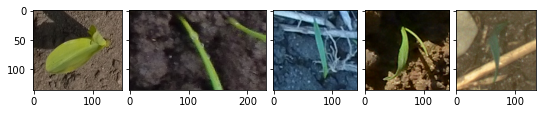

			 Class: 1


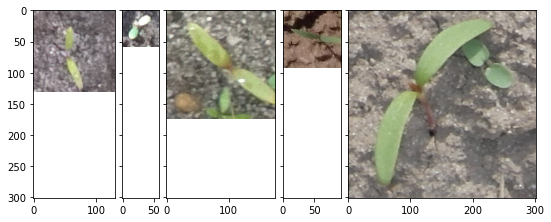

			 Class: 2


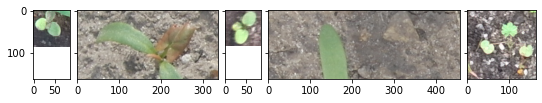

			 Class: 3


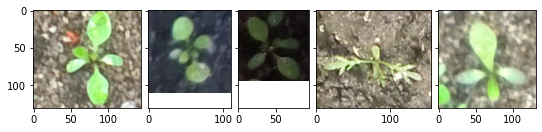

			 Class: 4


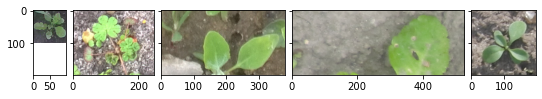

In [ ]:
#### loop five times on xtrain tto extract five images for each class 
x=0
y=5
for img in range(5):
    print("\t\t\t Class:",img)
    # function to plot the images in grid 
    draw_func(x_tr[x:y])
    x=x+180
    y=x+180

In [ ]:
# resize the xtrain and xtest to 64*64
size=(64,64)
x_tr_res,x_ts_res=resize_images(x_tr,x_ts,size)

shape of x_train after resizing (900, 64, 64, 3)
shape of y_train  (900,)
unique label in train [0 1 2 3 4]
shape of x_test after resizing (100, 64, 64, 3)
shape of y_test  (100,)
unique label in test [0 1 2 3 4]


Every image has the same size as this one (64*64).


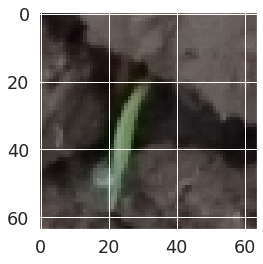

In [ ]:
plt.imshow(x_tr_res[35])
print("shape of x_train after resizing",x_tr_res.shape)###180*5=900
print("shape of y_train ",y_tr.shape)
print("unique label in train",np.unique(y_tr))
print("shape of x_test after resizing",x_ts_res.shape) ###20*5=100
print("shape of y_test ",y_ts.shape)
print("unique label in test",np.unique(y_ts))
print("\n")
print("Every image has the same size as this one (64*64).")

In [ ]:
# Extract validation set from training dataset 
X_tr, X_val, y_tr, y_val = train_test_split(x_tr_res, y_tr, test_size=0.2, random_state=42, stratify=y_tr, shuffle=True)


In [ ]:
print("count images inside every class in training labbel  ",Counter(y_tr))
print("count images inside every class in training labbel  ",Counter(y_val))


count images inside every class in training labbel   Counter({4: 144, 1: 144, 3: 144, 2: 144, 0: 144})
count images inside every class in training labbel   Counter({0: 36, 2: 36, 3: 36, 1: 36, 4: 36})


In [ ]:
### convert the three labels  to categorical  
y_tr_k = to_categorical(y_tr)
y_te_k = to_categorical(y_ts)
y_val_k= to_categorical(y_val)


In [ ]:
y_tr

array([4, 1, 3, 2, 2, 2, 1, 3, 2, 4, 3, 0, 2, 0, 2, 4, 4, 1, 2, 2, 2, 2,
       4, 4, 3, 2, 2, 4, 0, 0, 1, 1, 2, 2, 2, 4, 1, 1, 0, 2, 2, 1, 3, 0,
       3, 1, 3, 4, 1, 2, 2, 1, 3, 1, 0, 3, 2, 2, 0, 3, 3, 1, 3, 0, 0, 0,
       2, 2, 3, 1, 0, 1, 1, 1, 3, 0, 1, 0, 0, 1, 0, 3, 0, 0, 4, 0, 0, 3,
       3, 0, 4, 1, 2, 1, 0, 2, 2, 1, 3, 3, 4, 3, 3, 0, 4, 2, 1, 4, 2, 3,
       2, 3, 3, 3, 2, 3, 0, 2, 2, 3, 2, 0, 0, 3, 4, 4, 2, 4, 2, 0, 2, 3,
       3, 3, 4, 4, 1, 3, 1, 0, 0, 0, 3, 3, 3, 1, 2, 1, 2, 0, 0, 1, 2, 3,
       4, 4, 3, 0, 2, 2, 4, 2, 1, 4, 1, 4, 3, 2, 2, 0, 3, 3, 0, 2, 0, 0,
       4, 3, 1, 1, 4, 3, 0, 1, 1, 0, 3, 3, 1, 0, 3, 1, 3, 1, 4, 2, 3, 1,
       2, 3, 0, 3, 1, 3, 2, 3, 2, 0, 3, 3, 4, 3, 1, 1, 2, 1, 0, 3, 4, 0,
       3, 2, 2, 4, 2, 1, 0, 3, 2, 2, 1, 0, 2, 4, 2, 1, 1, 4, 0, 1, 2, 3,
       2, 4, 0, 3, 0, 0, 1, 1, 3, 4, 1, 0, 4, 3, 4, 4, 3, 4, 4, 1, 1, 4,
       3, 2, 2, 2, 4, 0, 4, 0, 2, 0, 0, 1, 0, 0, 4, 0, 4, 3, 4, 4, 3, 4,
       0, 1, 0, 4, 2, 0, 3, 2, 3, 2, 3, 3, 3, 1, 4,

In [ ]:
y_tr_k

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
print(X_tr.shape)
print(y_tr.shape)
print(X_val.shape)
print(y_val.shape)

(720, 64, 64, 3)
(720,)
(180, 64, 64, 3)
(180,)


## Part 1a. Transfer Learning - Classification Network (3 Marks)
For this assignment, you are asked to use the Keras implementation of VGG-16 as a starting point. 

Using the first 2 blocks of VGG-16 add extra Keras layers to create your own version of a CNN network for the classification of the images according to the number of leaves in the plant images. Note that there will be 5 classes. The last layer from VGG-16 will be block2 pool and you are allowed to add no more than five fully connected or convolutional layers to the network including the final output layer. 

- You can use as many pooling, flattening, 1 × 1 convolution layers, etc. as you wish but do not use any regularization.
- Train this simple network on the training set while monitoring convergence on the validation set.
- As input to the model use images of size no larger than 128×128.

Note, it is highly recommended to use even smaller input images to try things out. You are not expected to fine-tune the initial VGG layers.

When your classifier is working:
- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.


In [ ]:
# Write your code here
VGG_model = VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
###save all layer from vgg into dictionary and make model with my input shape and output last layer of block2 that saved into out_b2 whichg contains input all 2 blocks of vgg 
l_dict = dict([(layer.name, layer) for layer in VGG_model.layers])
out_b2 = l_dict['block2_pool'].output
vgg_model = tf.keras.Model(inputs=VGG_model.input, outputs=out_b2)

# make trainable layer flase to don't intialize it 
for layer in vgg_model.layers:
    layer.trainable = False


In [ ]:
# last layers fetch the last layer and add my new layers 
out_layer = vgg_model.layers[-1].output
out_layer = Conv2D(32, 3, activation='relu', padding='same')(out_layer)
out_layer = MaxPooling2D(pool_size=2)(out_layer)
# Flatten as before
out_layer = Flatten()(out_layer)
# add layers 
out_layer = Dense(512, activation='relu')(out_layer)
out_layer = Dense(256, activation='relu')(out_layer)
out_layer = Dense(128, activation='relu')(out_layer)
out_layer = Dense(5, activation='softmax')(out_layer)


In [ ]:
# build new model 
vgg_model_f = Model(inputs=vgg_model.input, outputs=out_layer)
vgg_model_f.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0  

In [ ]:
vgg_model_f.compile(optimizer = 'SGD',loss='categorical_crossentropy',metrics=['accuracy']) 
vgg_results_f=vgg_model_f.fit(X_tr, y_tr_k ,batch_size=100, epochs=50, validation_data=(X_val , y_val_k))

Epoch 1/50
8/8 [==============================] - 4s 425ms/step - loss: 6.7015 - accuracy: 0.2014 - val_loss: 1.6287 - val_accuracy: 0.2278
Epoch 2/50
8/8 [==============================] - 3s 398ms/step - loss: 1.6076 - accuracy: 0.2056 - val_loss: 1.5940 - val_accuracy: 0.2167
Epoch 3/50
8/8 [==============================] - 3s 442ms/step - loss: 1.5946 - accuracy: 0.2306 - val_loss: 1.6005 - val_accuracy: 0.2444
Epoch 4/50
8/8 [==============================] - 3s 428ms/step - loss: 1.5952 - accuracy: 0.2236 - val_loss: 1.5933 - val_accuracy: 0.2333
Epoch 5/50
8/8 [==============================] - 3s 405ms/step - loss: 1.5822 - accuracy: 0.2597 - val_loss: 1.5863 - val_accuracy: 0.2111
Epoch 6/50
8/8 [==============================] - 3s 407ms/step - loss: 1.5747 - accuracy: 0.2444 - val_loss: 1.5877 - val_accuracy: 0.2444
Epoch 7/50
8/8 [==============================] - 3s 406ms/step - loss: 1.5701 - accuracy: 0.2597 - val_loss: 1.5788 - val_accuracy: 0.2444
Epoch 8/50
8/8 [====

In [ ]:
#plotting loss of traning and testing
def plot_loss(result):
    plt.plot(result.history['loss'],'black')
    plt.plot(result.history['val_loss'],'green')
    plt.legend(['Train', 'val'])
    plt.title('Losses of training and validation')
    plt.xlabel('number of epochs')
    plt.ylabel('Losses')
    pass

#plotting accuracy for traning and testing 
def plot_accuracy(result):
    plt.plot(result.history['accuracy'],'black')
    plt.plot(result.history['val_accuracy'],'green')
    plt.legend(['Train', 'val'])
    plt.title('Accuracy of training and validation ')
    plt.xlabel('number of epochs')
    plt.ylabel('accuracy')
    pass 


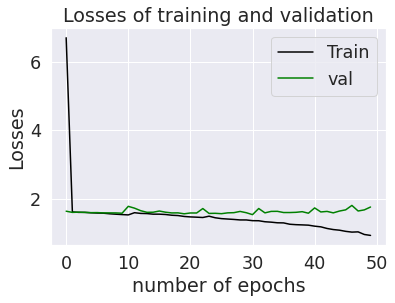

In [ ]:
#plotting loss of traning and testing
plot_loss(vgg_results_f)


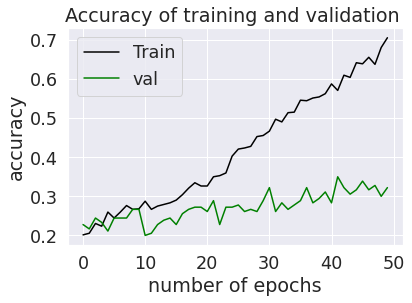

In [ ]:
#plotting accuracy for traning and testing 
plot_accuracy(vgg_results_f)

4/4 [==============================] - 0s 84ms/step


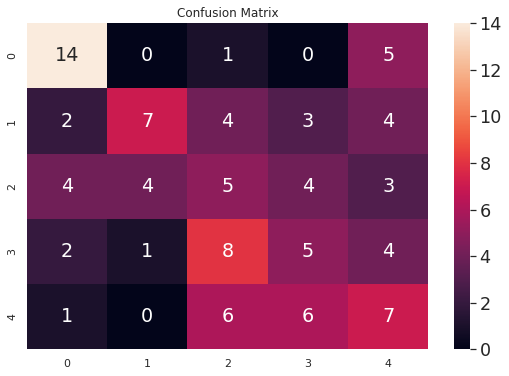

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        20
           1       0.58      0.35      0.44        20
           2       0.21      0.25      0.23        20
           3       0.28      0.25      0.26        20
           4       0.30      0.35      0.33        20

    accuracy                           0.38       100
   macro avg       0.40      0.38      0.38       100
weighted avg       0.40      0.38      0.38       100



In [ ]:
# ##confusion matrix for testing
Y_pred_ts = np.argmax(vgg_model_f.predict(x_ts_res),axis=1)
cm_ts=confusion_matrix(y_ts, Y_pred_ts)
plot_confusion_matrix(cm_ts)
print(classification_report(y_ts, Y_pred_ts))

23/23 [==============================] - 3s 120ms/step


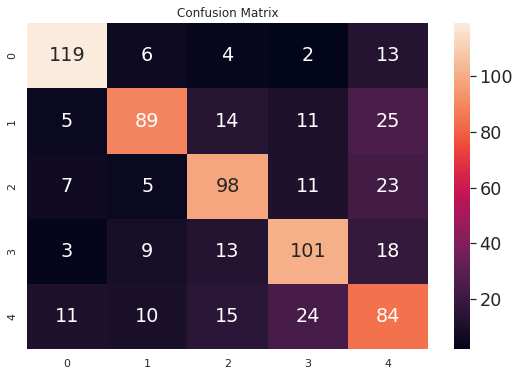

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       144
           1       0.75      0.62      0.68       144
           2       0.68      0.68      0.68       144
           3       0.68      0.70      0.69       144
           4       0.52      0.58      0.55       144

    accuracy                           0.68       720
   macro avg       0.69      0.68      0.68       720
weighted avg       0.69      0.68      0.68       720



In [ ]:
##confusion matrix for training
Y_pred_tr = np.argmax(vgg_model_f.predict(X_tr),axis=1)
cm_tr=confusion_matrix(y_tr, Y_pred_tr)
plot_confusion_matrix(cm_tr)
print(classification_report(y_tr, Y_pred_tr))


6/6 [==============================] - 1s 128ms/step


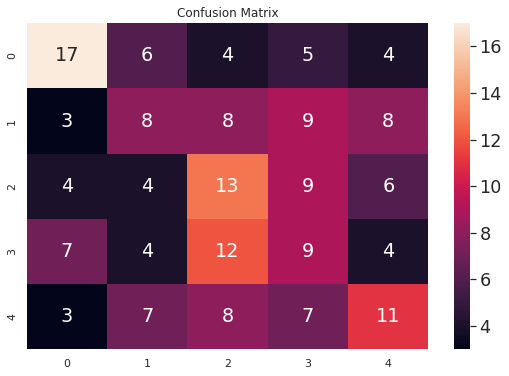

              precision    recall  f1-score   support

           0       0.50      0.47      0.49        36
           1       0.28      0.22      0.25        36
           2       0.29      0.36      0.32        36
           3       0.23      0.25      0.24        36
           4       0.33      0.31      0.32        36

    accuracy                           0.32       180
   macro avg       0.33      0.32      0.32       180
weighted avg       0.33      0.32      0.32       180



In [ ]:
##confusion matrix for validation

Y_pred_val = np.argmax(vgg_model_f.predict(X_val),axis=1)
cm_val=confusion_matrix(y_val, Y_pred_val)
plot_confusion_matrix(cm_val)
print(classification_report(y_val, Y_pred_val))


## Part 1b. Transfer Learning - Regression Reformulation (3 Marks)

### Step 1 (2)
Repeat the steps of Part 1a. but reformulate as a regression problem, i.e., your network needs to output a single float value ranging between 0 to 6 corresponding to the number of leaves. Again, you are not expected to fine-tune the initial VGG layers.

- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.

### Step 2 (1)
The size of the training data is quite small. Discuss based on your learning curves if overfitting is occurring with the models from Parts 1a and 1b.

In [ ]:
#Write your code here
VGG_model = VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
VGG_model.summary()

layer_dict = dict([(layer.name, layer) for layer in VGG_model.layers])
outp = layer_dict['block2_pool'].output
VGG_reg_model = tf.keras.Model(inputs=VGG_model.input, outputs=outp)
# intialize trainable layer flase 
for layer in VGG_reg_model.layers:
    layer.trainable = False
# last layers output
out = VGG_reg_model.layers[-1].output
out = Conv2D(32, 3, activation='relu', padding='same')(out)
out = MaxPooling2D(pool_size=2)(out)
# Flatten as before
out = Flatten()(out)
# add layers 
out = Dense(512, activation='relu')(out)
out = Dense(256, activation='relu')(out)
out = Dense(128, activation='relu')(out)
out = Dense(1, activation='linear')(out)
# build new model 
VGG_reg_model = Model(inputs=VGG_reg_model.input, outputs=out)
VGG_reg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
VGG_reg_model.compile( optimizer='Adam' , loss = 'mean_absolute_error',metrics=['mse'])
results_reg =VGG_reg_model.fit(X_tr, y_tr ,batch_size=100, epochs=50, validation_data=(X_val , y_val))

Epoch 1/50
8/8 [==============================] - 4s 458ms/step - loss: 10.5740 - mse: 416.5932 - val_loss: 1.9916 - val_mse: 5.9238
Epoch 2/50
8/8 [==============================] - 3s 414ms/step - loss: 1.5148 - mse: 3.4681 - val_loss: 1.2808 - val_mse: 2.2428
Epoch 3/50
8/8 [==============================] - 3s 405ms/step - loss: 1.2873 - mse: 2.2504 - val_loss: 1.2697 - val_mse: 2.1387
Epoch 4/50
8/8 [==============================] - 3s 447ms/step - loss: 1.2025 - mse: 1.9730 - val_loss: 1.1979 - val_mse: 1.9520
Epoch 5/50
8/8 [==============================] - 3s 418ms/step - loss: 1.1072 - mse: 1.6850 - val_loss: 1.1415 - val_mse: 1.8719
Epoch 6/50
8/8 [==============================] - 3s 426ms/step - loss: 1.0063 - mse: 1.5118 - val_loss: 1.1590 - val_mse: 2.0989
Epoch 7/50
8/8 [==============================] - 3s 413ms/step - loss: 0.9793 - mse: 1.5159 - val_loss: 1.0560 - val_mse: 1.7185
Epoch 8/50
8/8 [==============================] - 3s 407ms/step - loss: 0.8496 - mse: 1

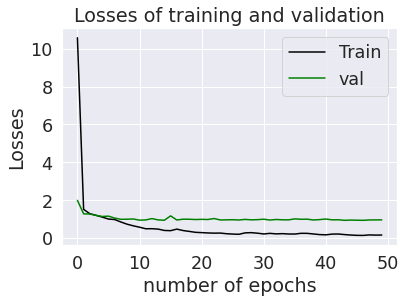

In [ ]:
#plotting loss of traning and testing 
plot_loss(results_reg)

Text(0, 0.5, 'mse')

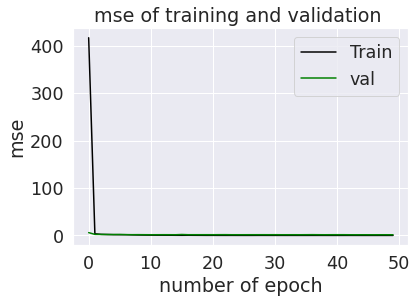

In [ ]:
#plotting accuracy for traning and testing 
plt.plot(results_reg.history['mse'],'black')
plt.plot(results_reg.history['val_mse'],'green')
plt.legend(['Train', 'val'])
plt.title('mse of training and validation ')
plt.xlabel('number of epoch')
plt.ylabel('mse')

In [ ]:
def prediction_fun(preiction):
    pred =preiction[:,0].round()
    pred_val=[]
    for p in pred:
        if p <= 0:
            pred_val.append(0.0)
        elif p >= 4 :
            pred_val.append(4.0)
        else:
            pred_val.append(p)
    return pred_val

4/4 [==============================] - 0s 84ms/step
the confusion matrix of test data


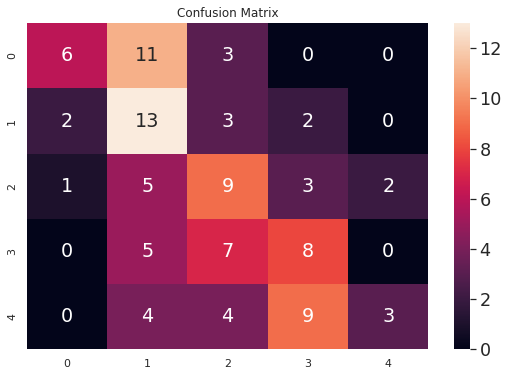

              precision    recall  f1-score   support

           0       0.67      0.30      0.41        20
           1       0.34      0.65      0.45        20
           2       0.35      0.45      0.39        20
           3       0.36      0.40      0.38        20
           4       0.60      0.15      0.24        20

    accuracy                           0.39       100
   macro avg       0.46      0.39      0.37       100
weighted avg       0.46      0.39      0.37       100



In [ ]:
####testing
pred_ts_reg = VGG_reg_model.predict(x_ts_res)
prediction_ts_reg = prediction_fun(pred_ts_reg)
cf_mx_ts = confusion_matrix(y_ts ,prediction_ts_reg )
print("the confusion matrix of test data" )
plot_confusion_matrix(cf_mx_ts)
print(classification_report(y_ts ,prediction_ts_reg ))


23/23 [==============================] - 3s 117ms/step
the confusion matrix of train data


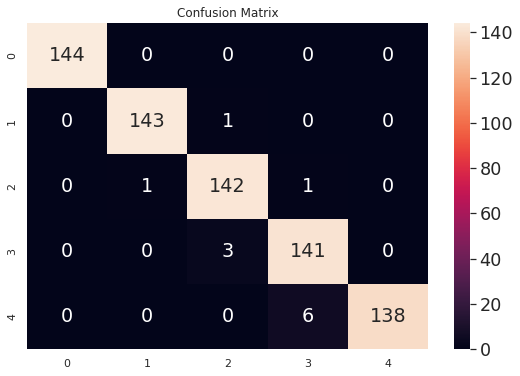

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       0.99      0.99      0.99       144
           2       0.97      0.99      0.98       144
           3       0.95      0.98      0.97       144
           4       1.00      0.96      0.98       144

    accuracy                           0.98       720
   macro avg       0.98      0.98      0.98       720
weighted avg       0.98      0.98      0.98       720



In [ ]:
####training
pred_tr_reg = VGG_reg_model.predict(X_tr)
prediction_tr_reg = prediction_fun(pred_tr_reg)
cf_mx_tr = confusion_matrix(y_tr ,prediction_tr_reg )
print("the confusion matrix of train data" )
plot_confusion_matrix(cf_mx_tr)
print(classification_report(y_tr ,prediction_tr_reg ))

6/6 [==============================] - 1s 118ms/step
the confusion matrix of validation data


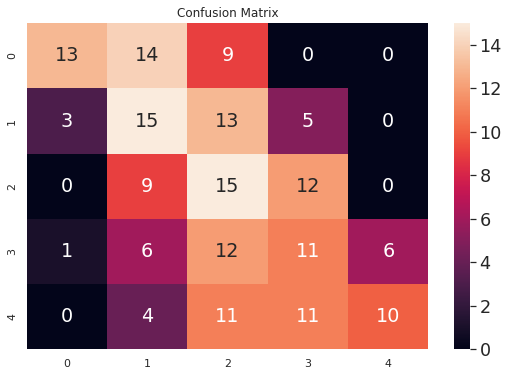

              precision    recall  f1-score   support

           0       0.76      0.36      0.49        36
           1       0.31      0.42      0.36        36
           2       0.25      0.42      0.31        36
           3       0.28      0.31      0.29        36
           4       0.62      0.28      0.38        36

    accuracy                           0.36       180
   macro avg       0.45      0.36      0.37       180
weighted avg       0.45      0.36      0.37       180



In [ ]:
####validation
pred_val_reg = VGG_reg_model.predict(X_val)
prediction_val_reg = prediction_fun(pred_val_reg)
cf_mx_val = confusion_matrix(y_val ,prediction_val_reg )
print("the confusion matrix of validation data" )
plot_confusion_matrix(cf_mx_val)
print(classification_report(y_val ,prediction_val_reg ))

# **discussion :**

### **PART1 a)**


***The model overfits more in training than in testing, which requires some regularisation to penalize and remove certain neurons to reduce overfitting, and even as data volume increases, the model gets more overfitting, less generic, and performs worse.***




### **PART1 b)**

**I tried using the mean squared error loss function, but overtraining prevented the training and validation accuracy from improving, so I switched to mean absolute error and used a linear function as activation. The accuracy was 0.98 in training and 0.39 in testing, despite the fact that the model was overfit, but it did learn. The overfitting issue would be resolved and test accuracy would rise if penalty and regularization were applied to the model.**


input_shape=(64,64,3)
tuned_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
tuned_model.summary()## Part 2. Improve your Model (4 Marks)

Regularization and data augmentation are common strategies to deal with small datasets.

### Step 1 (1.5)
Incorporate Batch Normalization and Dropout into your design the superior network trained in Part 1. You are not expected to fine-tune the initial VGG layers. Again you will provide the following:
- A loss curve for training and validation data
- An accuracy curve for training and validation data
- A confusion matrix of your network on the training including validation and testing data sets.
 

### Step 2 (1.5)
Train the same model from Step 1, now using data augmentation. Again, please provide the same output metrics as in Step 1.

### Step 3 (1)
Discuss based on your learning curves and final metrics in Step 2, how large a improvement can be observed from regularization and data augmentation.

### Part1

In [ ]:
###Step1
final_model = VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
final_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in final_model.layers])
outp = layer_dict['block2_pool'].output
final_model = tf.keras.Model(inputs=final_model.input, outputs=outp)
# make trainable layer flase to don't intialize it 
for layer in final_model.layers:
    layer.trainable = False
# last layers output
out = final_model.layers[-1].output
out = Conv2D(64, 3, activation='relu', padding='same')(out)
out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=2)(out)
out = Conv2D(64, 3, activation='relu', padding='same')(out)
out = BatchNormalization()(out)
out= Dropout(0.3)(out)
out = Conv2D(32, 3, activation='relu', padding='same')(out)
out = MaxPooling2D(pool_size=2)(out)
# Flatten as before
out = Flatten()(out)
# add layers 
out = Dense(256, activation='relu')(out)
out = BatchNormalization()(out)
out= Dropout(0.35)(out)
out = Dense(128, activation='relu')(out)
out = BatchNormalization()(out)
out= Dropout(0.5)(out)
out = Dense(128, activation='relu')(out)
out= Dropout(0.6)(out)
out = BatchNormalization()(out)
out = Dense(5, activation='softmax')(out)
# build new model 
final_model = Model(inputs=final_model.input, outputs=out)
final_model.summary()

Model: "model_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0  

In [ ]:
final_model.compile(optimizer= 'SGD', loss = 'categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=60, mode = "min", restore_best_weights =True)
results_final_model =final_model.fit(X_tr, y_tr_k ,batch_size=128, epochs=160, validation_data=(X_val , y_val_k),callbacks=[callback])

Epoch 1/160
6/6 [==============================] - 5s 645ms/step - loss: 2.1803 - accuracy: 0.2181 - val_loss: 2.0964 - val_accuracy: 0.2056
Epoch 2/160
6/6 [==============================] - 3s 603ms/step - loss: 2.1664 - accuracy: 0.2153 - val_loss: 1.8287 - val_accuracy: 0.2389
Epoch 3/160
6/6 [==============================] - 3s 596ms/step - loss: 2.2142 - accuracy: 0.1861 - val_loss: 1.8293 - val_accuracy: 0.1889
Epoch 4/160
6/6 [==============================] - 4s 606ms/step - loss: 2.1720 - accuracy: 0.2056 - val_loss: 1.8913 - val_accuracy: 0.1500
Epoch 5/160
6/6 [==============================] - 4s 596ms/step - loss: 2.2054 - accuracy: 0.2069 - val_loss: 1.7408 - val_accuracy: 0.1556
Epoch 6/160
6/6 [==============================] - 4s 613ms/step - loss: 2.1614 - accuracy: 0.2153 - val_loss: 1.7371 - val_accuracy: 0.1778
Epoch 7/160
6/6 [==============================] - 4s 601ms/step - loss: 2.0936 - accuracy: 0.2028 - val_loss: 1.7193 - val_accuracy: 0.1889
Epoch 8/160
6

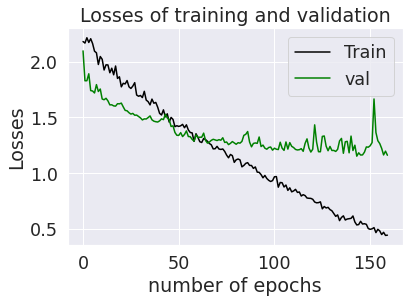

In [ ]:
#plotting loss of traning and testing 
plot_loss(results_final_model)

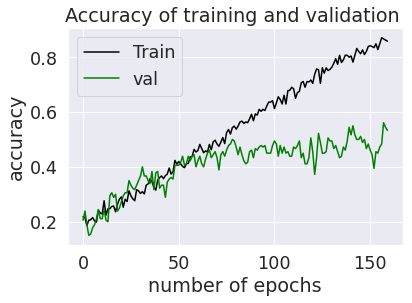

In [ ]:
#plotting accuracy for traning and testing 
plot_accuracy(results_final_model)

4/4 [==============================] - 1s 92ms/step


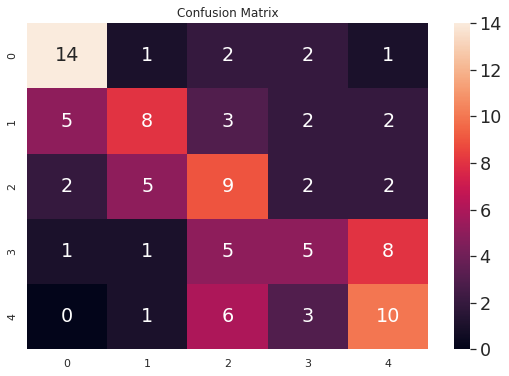

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        20
           1       0.50      0.40      0.44        20
           2       0.36      0.45      0.40        20
           3       0.36      0.25      0.29        20
           4       0.43      0.50      0.47        20

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.46      0.46      0.45       100



In [ ]:
# ##confusion matrix for testing
Y_pred_ts = np.argmax(final_model.predict(x_ts_res),axis=1)
cm_ts=confusion_matrix(y_ts, Y_pred_ts)
plot_confusion_matrix(cm_ts)
print(classification_report(y_ts, Y_pred_ts))

23/23 [==============================] - 3s 130ms/step


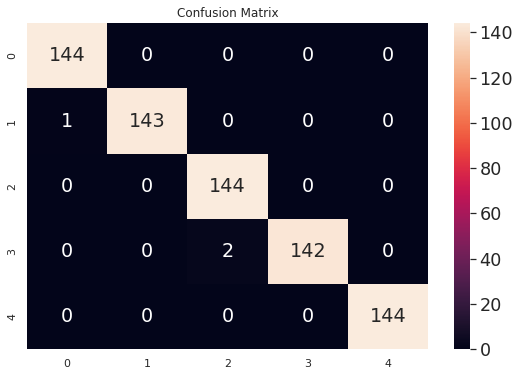

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       144
           1       1.00      0.99      1.00       144
           2       0.99      1.00      0.99       144
           3       1.00      0.99      0.99       144
           4       1.00      1.00      1.00       144

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [ ]:
##confusion matrix for training
Y_pred_tr = np.argmax(final_model.predict(X_tr),axis=1)
cm_tr=confusion_matrix(y_tr, Y_pred_tr)
plot_confusion_matrix(cm_tr)
print(classification_report(y_tr, Y_pred_tr))


6/6 [==============================] - 1s 116ms/step


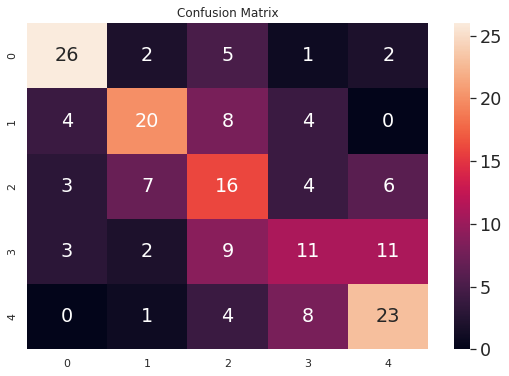

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        36
           1       0.62      0.56      0.59        36
           2       0.38      0.44      0.41        36
           3       0.39      0.31      0.34        36
           4       0.55      0.64      0.59        36

    accuracy                           0.53       180
   macro avg       0.53      0.53      0.53       180
weighted avg       0.53      0.53      0.53       180



In [ ]:
##confusion matrix for validation
Y_pred_val = np.argmax(final_model.predict(X_val),axis=1)
cm_val=confusion_matrix(y_val, Y_pred_val)
plot_confusion_matrix(cm_val)
print(classification_report(y_val, Y_pred_val))

## Step2 DataAugenentation used regualized Model 

In [ ]:
###Data Augementation based on training 
tr_augmentation =ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=30, width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
tr_augmentation.fit(X_tr)
train_generator = tr_augmentation.flow(X_tr,y_tr_k,batch_size=180)

In [ ]:
final_model2 = VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
final_model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in final_model2.layers])
outp = layer_dict['block2_pool'].output
final_model2 = tf.keras.Model(inputs=final_model2.input, outputs=outp)
# make trainable layer flase to don't intialize it 
for layer in final_model2.layers:
    layer.trainable = False

In [ ]:
# last layers output
out2 = final_model2.layers[-1].output
out2 = Conv2D(64, 3, activation='relu', padding='same')(out2)
out2 = BatchNormalization()(out2)
out2 = MaxPooling2D(pool_size=2)(out2)
out2 = Conv2D(64, 3, activation='relu', padding='same')(out2)
out2 = BatchNormalization()(out2)
out2= Dropout(0.3)(out2)
out2 = Conv2D(32, 3, activation='relu', padding='same')(out2)
out2 = MaxPooling2D(pool_size=2)(out2)
# Flatten as before
out2 = Flatten()(out2)
# add layers 
out2 = Dense(256, activation='relu')(out2)
out2 = BatchNormalization()(out2)
out2= Dropout(0.35)(out2)
out2 = Dense(128, activation='relu')(out2)
out2 = BatchNormalization()(out2)
out2= Dropout(0.5)(out2)
out2 = Dense(128, activation='relu')(out2)
out2= Dropout(0.6)(out2)
out2 = BatchNormalization()(out2)
out2 = Dense(5, activation='softmax')(out2)
# build new model 
final_model2 = Model(inputs=final_model2.input, outputs=out2)
final_model2.summary()

Model: "model_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0  

In [ ]:
final_model2.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=60, mode = "min", restore_best_weights =True)
results_final_model_aug =final_model2.fit(train_generator, epochs=500, validation_data=(X_val, y_val_k),callbacks=[callback] ) 


Epoch 1/500
4/4 [==============================] - 6s 1s/step - loss: 2.3128 - accuracy: 0.1806 - val_loss: 1.7747 - val_accuracy: 0.2000
Epoch 2/500
4/4 [==============================] - 4s 995ms/step - loss: 2.1780 - accuracy: 0.2264 - val_loss: 1.6762 - val_accuracy: 0.1889
Epoch 3/500
4/4 [==============================] - 4s 1s/step - loss: 2.1132 - accuracy: 0.2250 - val_loss: 1.6691 - val_accuracy: 0.2167
Epoch 4/500
4/4 [==============================] - 4s 995ms/step - loss: 2.2087 - accuracy: 0.2028 - val_loss: 1.6965 - val_accuracy: 0.2000
Epoch 5/500
4/4 [==============================] - 4s 1s/step - loss: 2.1490 - accuracy: 0.2194 - val_loss: 1.6616 - val_accuracy: 0.2056
Epoch 6/500
4/4 [==============================] - 4s 955ms/step - loss: 2.1529 - accuracy: 0.2139 - val_loss: 1.6285 - val_accuracy: 0.1667
Epoch 7/500
4/4 [==============================] - 4s 1s/step - loss: 2.1724 - accuracy: 0.1778 - val_loss: 1.6361 - val_accuracy: 0.1833
Epoch 8/500
4/4 [========

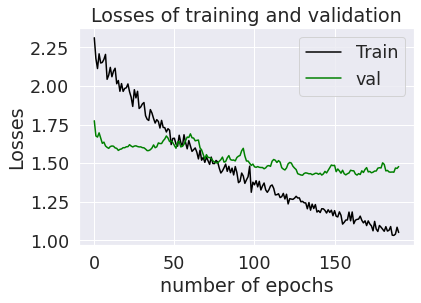

In [ ]:
#plotting loss of traning and testing 
plot_loss(results_final_model_aug)

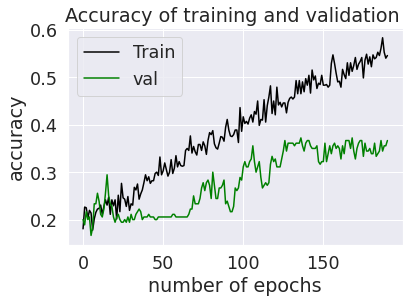

In [ ]:
#plotting accuracy for traning and testing 
plot_accuracy(results_final_model_aug)

4/4 [==============================] - 1s 81ms/step


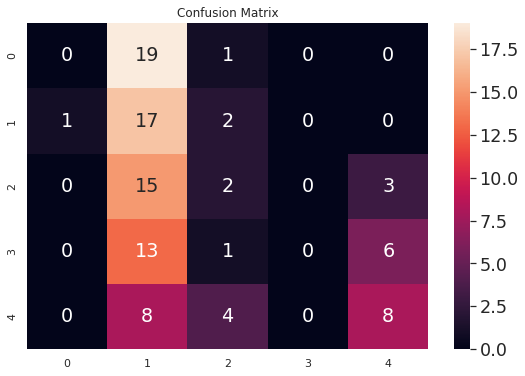

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.24      0.85      0.37        20
           2       0.20      0.10      0.13        20
           3       0.00      0.00      0.00        20
           4       0.47      0.40      0.43        20

    accuracy                           0.27       100
   macro avg       0.18      0.27      0.19       100
weighted avg       0.18      0.27      0.19       100



In [ ]:
# ##confusion matrix for testing
Y_pred_ts = np.argmax(final_model2.predict(x_ts_res),axis=1)
cm_ts=confusion_matrix(y_ts, Y_pred_ts)
plot_confusion_matrix(cm_ts)
print(classification_report(y_ts, Y_pred_ts))

23/23 [==============================] - 3s 124ms/step


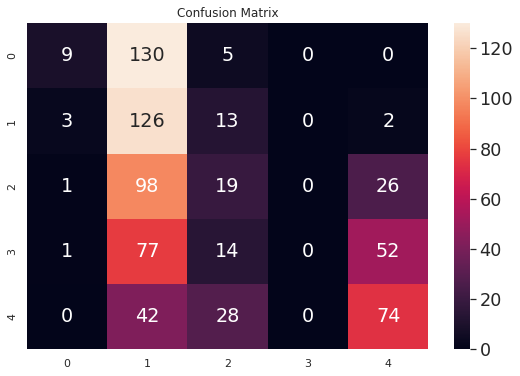

              precision    recall  f1-score   support

           0       0.64      0.06      0.11       144
           1       0.27      0.88      0.41       144
           2       0.24      0.13      0.17       144
           3       0.00      0.00      0.00       144
           4       0.48      0.51      0.50       144

    accuracy                           0.32       720
   macro avg       0.33      0.32      0.24       720
weighted avg       0.33      0.32      0.24       720



In [ ]:
##confusion matrix for training
Y_pred_tr = np.argmax(final_model2.predict(X_tr),axis=1)
cm_tr=confusion_matrix(y_tr, Y_pred_tr)
plot_confusion_matrix(cm_tr)
print(classification_report(y_tr, Y_pred_tr))

6/6 [==============================] - 1s 127ms/step


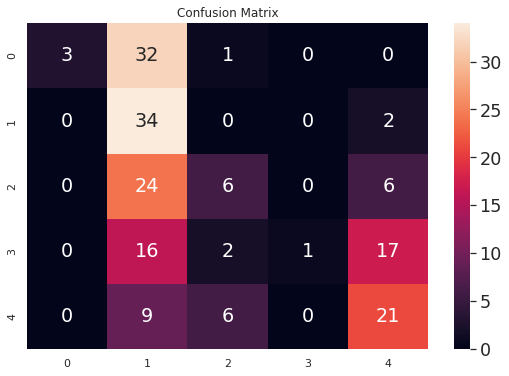

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        36
           1       0.30      0.94      0.45        36
           2       0.40      0.17      0.24        36
           3       1.00      0.03      0.05        36
           4       0.46      0.58      0.51        36

    accuracy                           0.36       180
   macro avg       0.63      0.36      0.28       180
weighted avg       0.63      0.36      0.28       180



In [ ]:
##confusion matrix for validation
Y_pred_val = np.argmax(final_model2.predict(X_val),axis=1)
cm_val=confusion_matrix(y_val, Y_pred_val)
plot_confusion_matrix(cm_val)
print(classification_report(y_val, Y_pred_val))

# Discussion part 2 

##part2 a)

The drawing's regularisation section shows that up until epoch 80, overfitting was eliminated, but I've increased the number of epochs to 500 to examine how the model performed throughout that epoch and to keep track of changes in the validation accuracy. However, as I mentioned earlier, I wanted to know how the validation accuracy performed over a large number of epochs in order to prevent halting the early stopping and see the change over the term of 20 patents. If you make the patent with a value of less than 20, the overfit will stop. In my perspective, the test-accuracy has been enhanced to 49 % and the model performance although increased but after 80 epoch there were an overfit so i interested to increase the accuracy of the model.

##part2 b)

The accuracy is not raised during model training while using data augmentation to increase the training data. The many forms created from the same data will differ in terms of size, rotation, zoom, and shifting. The model didn't overfit until epoch 40, so I tried changing the image generation function to different parameters and different values, and this is the best one. I need to change it more until reaching the augmentation data help to increase the accuracy, but I noticed something. The image of the feature made the model predict correctly more, and the loss of the model decreased so much and accuracy is increasing. The model needs to be trained more, and the accuracy will increase.
and also the model did not predict or recognize class zero and three. 



## References
[1] N. Teimouri, M. Dyrmann, P. R. Nielsen, S. K. Mathiassen, G. J. Somerville, and R. N. Jørgensen, “Weed growth stage estimator using deep convolutional neural networks,” Sensors, vol. 18, no. 5, 2018.